#Question 1

##Part 1

In [ ]:
import os
import pandas as pd
os.system("wget https://www.dropbox.com/s/wvcta8bmbvqowq2/iris.csv")

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv("iris.csv", names=column_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Exploratory analysis

print("df describe")
print(df.describe())
print()

print("df isna")
print(df.isna().sum())
print()

print("col wise value count")
for name in column_names:
    print(df[name].value_counts())
print()


df describe
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

df isna
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

col wise value count
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3 

df plot


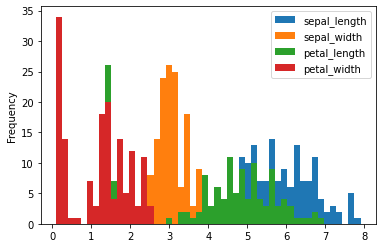

In [ ]:
#Exploratory analysis
print("df plot")
import matplotlib.pyplot as plt
df.plot.hist(bins=50)
plt.show()

In [ ]:
#preprocess getting unique values
unique_values = df['species'].unique()
unique_values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Preprocessing the data
df["species"] = df["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1,"Iris-virginica":2})
y=df['species']
X=df.drop(['species'],axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# X = pd.DataFrame(scaler.fit_transform(X),columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X=scaler.fit_transform(X)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
preservedX=X
preservedy=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Part 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
def covariance(matrix):
    """
    This is only for (x,2) shaped matrix
    """

    if matrix.shape[1] == 2:
        mean_array = []
        for i in range(2):
            total = 0
            for j in range(matrix.shape[0]):
                total += matrix[j, i]
            mean = total / matrix.shape[0]
            mean_array.append(mean)
        
        cov_array = []
        for i in range(2):
            for j in range(2):
                total = 0
                for k in range(matrix.shape[0]):
                    total += (matrix[k, i] - mean_array[i]) * (matrix[k, j] - mean_array[j])
                cov = total / matrix.shape[0]
                cov_array.append(cov)
        
        covariance_matrix = np.array(cov_array).reshape(2, 2)
        return covariance_matrix
    else:
        print("Error: Input matrix should have shape (x, 2)")


class GaussianBayesClassifier:
    def __init__(self, sigma,X,y):
        self.sigma = sigma
        self.parameters = {}
        self.X=X
        self.y = y
        

    def train(self, X, y):
        self.X = X
        self.y = y
        self.uniqclasses = np.unique(y)
        self.parameters = {}
        for c in self.uniqclasses:
            X_c = X[y == c]
            if self.sigma == 'I':
                cov = np.identity(X_c.shape[1]) * X_c.var(axis=0).mean()
            elif self.sigma == 'actual':
                cov = np.cov(X_c.T)
            elif self.sigma == 'identical_but_arbitrary':
                cov = np.cov(X.T) * np.identity(X.shape[1])
            self.parameters[c] = {'mean': X_c.mean(axis=0), 'cov': cov}

    def gauss_pdf_value(self, x, mean, cov):
        d = x.shape[0]
        det = np.linalg.det(cov)
        inv = np.linalg.inv(cov)
        return np.exp(-0.5 * np.dot(np.dot((x - mean).T, inv), (x - mean))) / np.sqrt((2 * np.pi) ** d * det)

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            probs = []
            for c in self.uniqclasses:
                mean = self.parameters[c]['mean']
                cov = self.parameters[c]['cov']
                prob = self.gauss_pdf_value(X[i, :], mean, cov)
                probs.append(prob)
            y_pred.append(self.uniqclasses[np.argmax(probs)])
        return np.array(y_pred)

    def test(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return y_pred, accuracy

    def plot_decision_boundary(self, X, y, feature_names):
        num_features = X.shape[1]
        feature_combinations = list(itertools.combinations(range(num_features), 2))
        for combination in feature_combinations:
            self.train(X[:, [combination[0],combination[1]]], y)
    
            x_min, x_max = X[:, combination[0]].min() - 1, X[:, combination[0]].max() + 1
            y_min, y_max = X[:, combination[1]].min() - 1, X[:, combination[1]].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))
    
            X_plot = np.c_[xx.ravel(), yy.ravel()]
            Z = self.predict(X_plot)
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.3)
            plt.scatter(X[:, combination[0]], X[:, combination[1]], c=y)
            plt.title("Decision Boundary with Features {} and {}".format(feature_names[combination[0]], feature_names[combination[1]]))
            plt.show()   
    

##Part 3

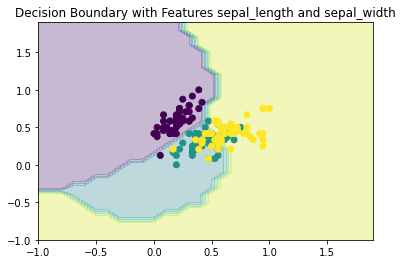

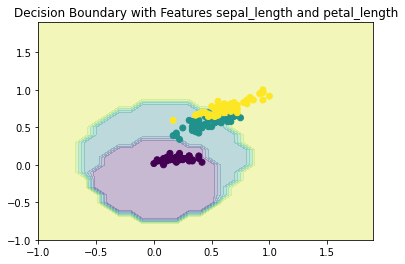

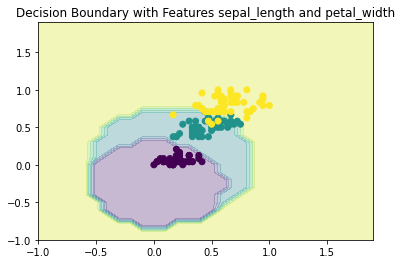

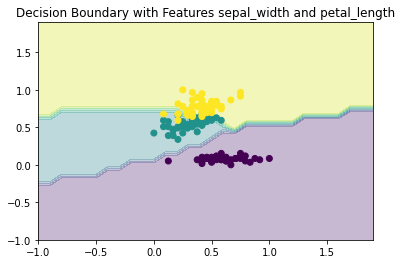

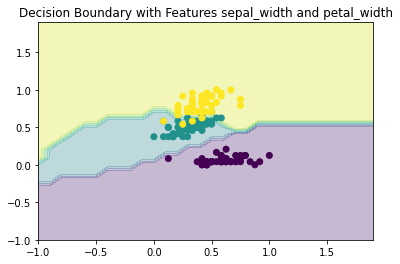

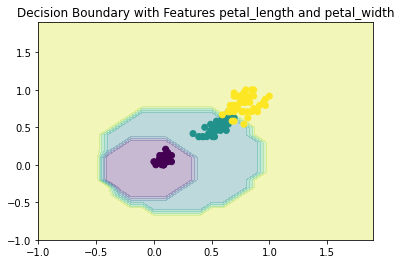

In [ ]:
# Plot the decision boundary for each model
feature= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

model=GaussianBayesClassifier('I', X_train, y_train)
model.train(X_train, y_train)
model.plot_decision_boundary(X, y,feature)




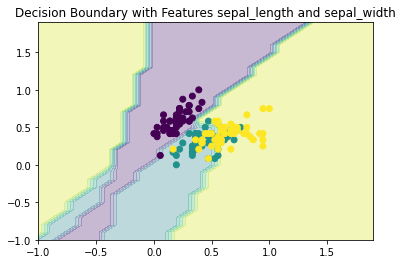

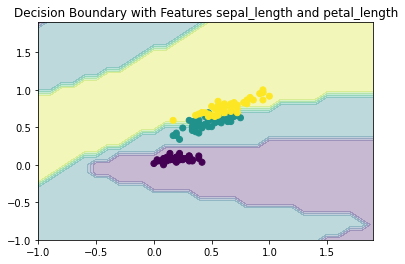

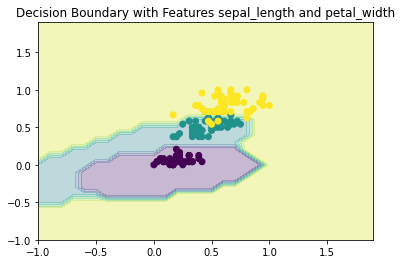

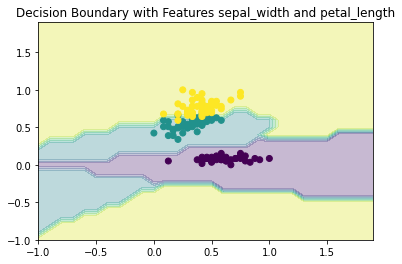

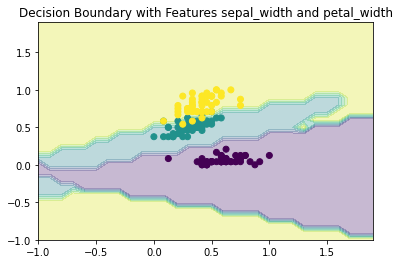

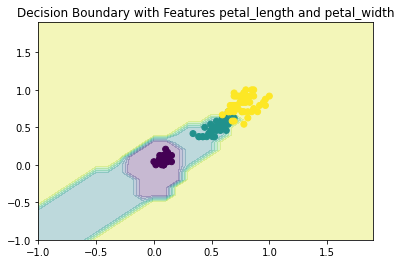

In [ ]:
model=GaussianBayesClassifier('actual', X_train, y_train)
model.train(X_train, y_train)
model.plot_decision_boundary(X, y,feature)

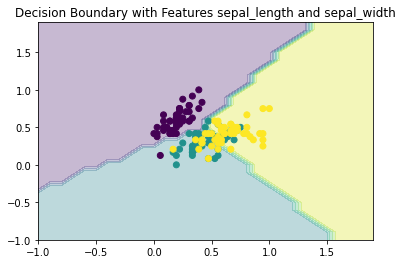

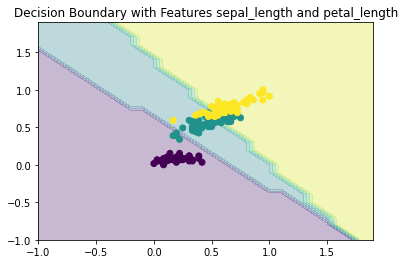

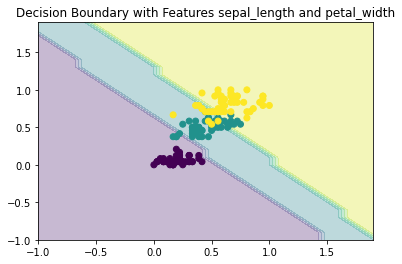

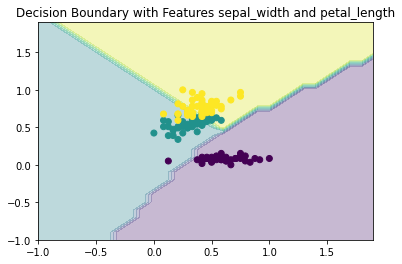

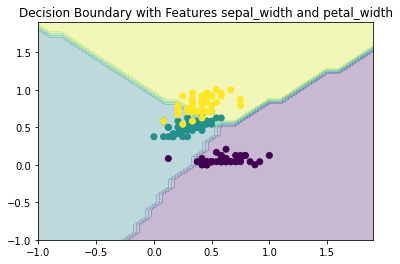

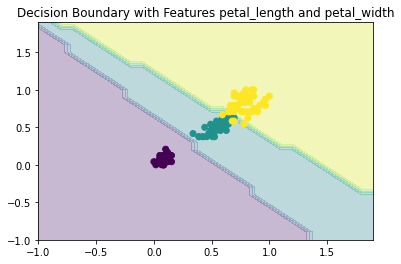

In [ ]:
model=GaussianBayesClassifier('identical_but_arbitrary', X_train, y_train)
model.train(X_train, y_train)
model.plot_decision_boundary(X, y,feature)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

models = [GaussianBayesClassifier('I', X_train, y_train), GaussianBayesClassifier('actual', X_train, y_train), GaussianBayesClassifier('identical_but_arbitrary', X_train, y_train)]
model_names = ['Identity', 'actual', 'identical_but_arbitrary']

for i, model in enumerate(models):
    model.train(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Performance of {}:".format(model_names[i]))
    y_pred = model.predict(X_test)
    acc=100 * (y_test == y_pred).mean()
    print("Accuracy: ", acc)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print()
    print()



Performance of Identity:
Accuracy:  93.33333333333333
Confusion Matrix: 
 [[19  0  0]
 [ 0 10  3]
 [ 0  0 13]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.77      0.87        13
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45



Performance of actual:
Accuracy:  100.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00

##Part 4

In [ ]:
class GaussianBayesClassifier:
    def __init__(self, sigma, X, y):
        self.sigma = sigma
        self.X = X
        self.y = y
        self.uniqclasses = np.unique(y)
        self.parameters = {}
        
        for c in (self.uniqclasses):
            X_c = X[y == c]
            X_c = pd.DataFrame(X_c)  # convert to DataFrame
            if self.sigma == 'I':
                cov = np.identity(X_c.shape[1]) * X_c.var().to_numpy()
                average = sum(np.diag(cov)) / X_c.shape[1]
                cov = np.identity(X_c.shape[1]) * average
            elif self.sigma == 'actual':
                cov = X_c.cov().to_numpy()
            elif self.sigma == 'identical_but_arbitrary':
                cov = np.cov(X_c, rowvar=False) * np.identity(X_c.shape[1])

            self.parameters[c] = {'mean': X_c.mean(axis=0).to_numpy(),
                                  'cov': cov}

    
    def gauss_pdf_value(self, x, mean, cov):
        d = x.shape[0]
        det = np.linalg.det(cov)
        inv = np.linalg.inv(cov)
        return np.exp(-0.5 * np.dot(np.dot((x - mean).T, inv), (x - mean)))/np.sqrt((2 * np.pi)**d * det)

    
    def train(self, X, y):
        self.X = X
        self.y = y
        self.uniqclasses = np.unique(y)
        #rest part is already present in the __init__

    def test(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return y_pred, accuracy
    
    
    def plot_decision_boundary(model, X, y,feature_names):
        num_features = X.shape[1]
        feature_combinations = list(itertools.combinations(range(num_features), 2))
        print(model.parameters)
        for combination in feature_combinations:
            x_min, x_max = X[:, combination[0]].min() - 1, X[:, combination[0]].max() + 1
            y_min, y_max = X[:, combination[1]].min() - 1, X[:, combination[1]].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

            X_plot = np.c_[xx.ravel(), yy.ravel()]
            Z = model.predict(X_plot)
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.3, cmap='Paired')
            plt.scatter(X[:, combination[0]], X[:, combination[1]], c=labels)
            plt.title("Decision Boundary with Features {} and {}".format(feature_names[combination[0]], feature_names[combination[1]]))
            plt.show()

    
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            probs = []
            for c in self.uniqclasses:
                mean = self.parameters[c]['mean']
                cov = self.parameters[c]['cov']
                prob = self.gauss_pdf_value(X[i, :].reshape(-1, 1), mean.reshape(-1, 1), cov)
                probs.append(prob)
            y_pred.append(self.uniqclasses[np.argmax(probs)])
        return np.array(y_pred)
from sklearn.model_selection import KFold
X, y=preservedX, preservedy
kfold = KFold(n_splits=5, shuffle=True)
scores = []
models = [GaussianBayesClassifier('I', X_train, y_train), GaussianBayesClassifier('actual', X_train, y_train), GaussianBayesClassifier('identical_but_arbitrary', X_train, y_train)]
for i,model in enumerate(models):
    for train_index, val_index in kfold.split(X, y):
        X_train_k, X_val_k = X[train_index], X[val_index]
        y_train_k, y_val_k = y[train_index], y[val_index]
        y_val_pred = model.predict(X_val_k)
        accuracy = np.mean(y_val_pred == y_val_k)
        scores.append(accuracy)
    print("Average accuracy:", np.mean(scores)," using model:",model_names[i])


Average accuracy: 0.9266666666666665  using model: Identity
Average accuracy: 0.9566666666666667  using model: actual
Average accuracy: 0.9555555555555556  using model: identical_but_arbitrary


##Part 5

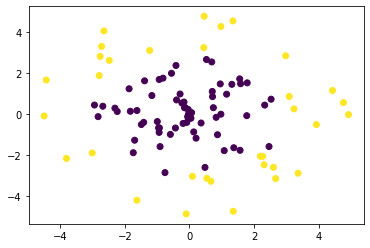

Accuracy: 0.91
{1.0: {'mean': array([-0.13895943,  0.09988553]), 'cov': array([[1.6281497 , 0.08764522],
       [0.08764522, 1.4178638 ]])}, 2.0: {'mean': array([ 0.50249889, -0.03547637]), 'cov': array([[ 7.88855618, -1.47028887],
       [-1.47028887,  8.85125208]])}}


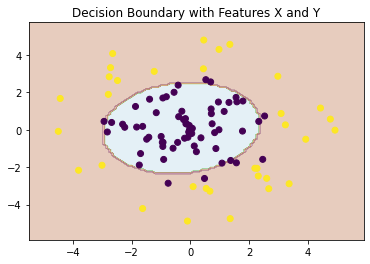

In [ ]:

    
    
import random
def select_rand_point_of_circle_with_max_r(r):
    # Selecting random angle
    theta = random.uniform(0, 2 * np.pi)
    r = random.uniform(0, r)
    # Converting polar coordinates to cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return [x, y]


points=[]
for i in range(100):
    point = select_rand_point_of_circle_with_max_r(np.sqrt(25))
    points.append(point)
points = np.array(points)  
labels=np.zeros(100) 
labels[points[:, 0]**2 + points[:, 1]**2 <= 9] = 1
labels[(points[:, 0]**2 + points[:, 1]**2 > 9) & (points[:, 0]**2 + points[:, 1]**2 <= 25)] = 2

plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.show()

model = GaussianBayesClassifier('actual', X=points, y=labels)
model.train(points, labels)
y_pred, accuracy = model.test(points, labels)
print("Accuracy:", accuracy)
model.plot_decision_boundary(points, labels, ['X','Y'])


#Problem 2

##Part 1

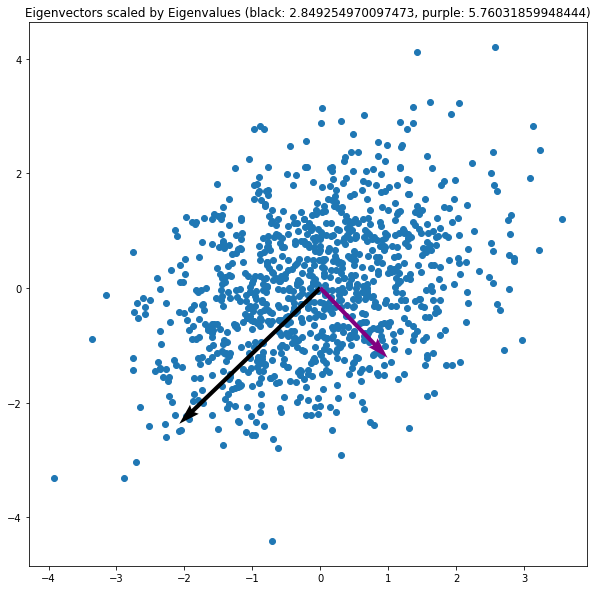

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def covariance(matrix):
    """
    This is only for (x,2) shaped matrix
    """

    if matrix.shape[1] == 2:
        mean_array = []
        for i in range(2):
            total = 0
            for j in range(matrix.shape[0]):
                total += matrix[j, i]
            mean = total / matrix.shape[0]
            mean_array.append(mean)
        
        cov_array = []
        for i in range(2):
            for j in range(2):
                total = 0
                for k in range(matrix.shape[0]):
                    total += (matrix[k, i] - mean_array[i]) * (matrix[k, j] - mean_array[j])
                cov = total / matrix.shape[0]
                cov_array.append(cov)
        
        covariance_matrix = np.array(cov_array).reshape(2, 2)
        return covariance_matrix
    else:
        print("Error: Input matrix should have shape (x, 2)")


#Given
mean = [0, 0]
cov = [[1.5, 0.5], 
       [ 0.5, 1.5]]

# Generate random X(arrary of points) from the multivariate normal distribution
X = np.random.multivariate_normal(mean, cov, 1000)
# print(X.shape)==(1000,2)


cov_matrix = covariance(X)  #create covariance martrix from the X(array of points)
# print(cov_matrix)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) # Finding eigenvalues and eigenvector

# Plotting
fig = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1])
plt.quiver(mean[0], mean[1], eigenvectors[0, 0], eigenvectors[0, 1], scale=eigenvalues[0]*3)
plt.quiver(mean[0], mean[1], eigenvectors[1, 0], eigenvectors[1, 1], color='purple', scale=eigenvalues[1]*3)
plt.title(f'Eigenvectors scaled by Eigenvalues (black: {eigenvalues[0]*3}, purple: {eigenvalues[1]*3})')
plt.show()


In [ ]:
print(eigenvalues, eigenvectors)

[0.94975166 1.9201062 ] [[-0.7202092  -0.69375695]
 [ 0.69375695 -0.7202092 ]]


##Part 2

In [ ]:
import scipy.linalg  as cip

cov1=cip.sqrtm(np.linalg.inv(cov_matrix))
Y=(np.dot(cov1,X.T)).T
print(covariance(Y))

# The purpose of this transformation is to reduce the correlation between the variables. This can be seen by the fact that the new covariance matrix has lower (almost identity matrix) values compared to the initial covariance matrix, indicating that the variables are less correlated. The purpose of the transformation could be to normalize the data, make the variables independent, or for some other statistical or machine learning applications.


[[ 1.00000000e+00 -4.07340828e-16]
 [-4.07340828e-16  1.00000000e+00]]


##Part 3

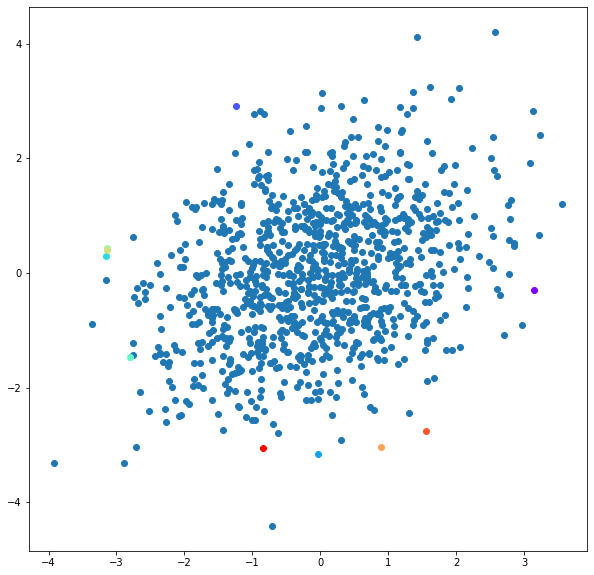

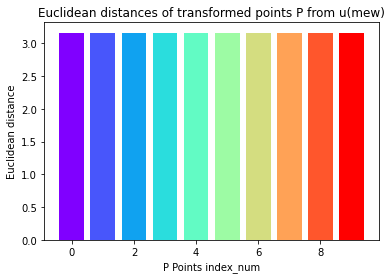

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance

def select_rand_point_of_circle(r):
    # Selecting random angle
    theta = random.uniform(0, 2 * np.pi)

    # Converting polar coordinates to cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return [x, y]

P = []
for i in range(10):
    point = select_rand_point_of_circle(np.sqrt(10))
    P.append(point)
P = np.array(P)

def plot_points(X, P):
    # Plotting X
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(X[:, 0], X[:, 1], label='X')

    # Plotting each point in P
    colors = plt.cm.rainbow(np.linspace(0, 1, len(P)))
    for i in range(len(P)):
        plt.scatter(P[i, 0], P[i, 1], color=colors[i], label=f'P_{i}')

    plt.show()

def plot_distances(P, mean):
    distances = []
    for p in P:
        dist = distance.euclidean(p, mean)
        distances.append(dist)
    distances = np.array(distances)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(P)))
    # bar plot
    plt.bar(range(len(P)), distances, color=colors)
    plt.xlabel('P Points index_num')
    plt.ylabel('Euclidean distance')
    plt.title('Euclidean distances of transformed points P from u(mew)')

    plt.show()

plot_points(X, P)
plot_distances(P, mean)


##Part 4

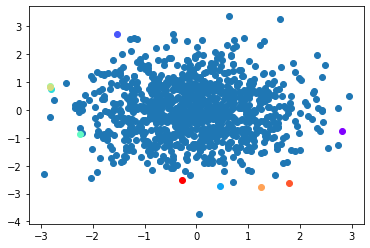

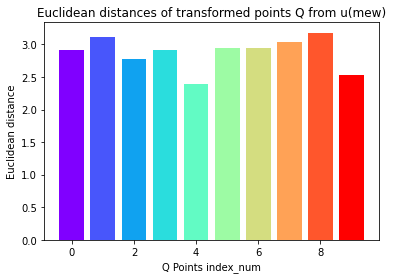

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Q=(sigma)^-0.5 P
cov1=cip.sqrtm(np.linalg.inv(cov_matrix))
Q=(np.dot(cov1,P.T)).T
distances = []
for q in Q:
    dist = distance.euclidean(q, mean)
    distances.append(dist)
distances = np.array(distances)

# Plot
plt.scatter(Y[:, 0], Y[:, 1])
colors = plt.cm.rainbow(np.linspace(0, 1, len(Q)))
for i in range(len(Q)):
    plt.scatter(Q[i, 0], Q[i, 1], color=colors[i], label=f'Q_{i}')
plt.show()

# Plot of euclidean_dist of transformed point from u
plt.bar(range(len(Q)), distances, color=colors)
plt.xlabel('Q Points index_num')
plt.ylabel('Euclidean distance')
plt.title('Euclidean distances of transformed points Q from u(mew)')
plt.show()



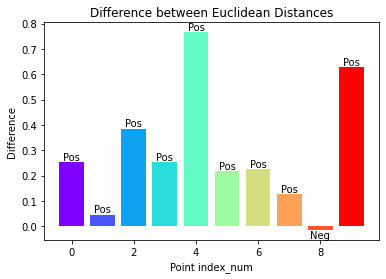

In [ ]:
distancesdiff1 = [distance.euclidean(p, mean) for p in P]
distancesdiff2 = [distance.euclidean(q, mean) for q in Q]
distancediff = [(d1-d2) for d1, d2 in zip(distancesdiff1, distancesdiff2)]

fig = plt.figure()
plt.bar(np.arange(len(distancediff)), distancediff, color=colors)
plt.title("Difference between Euclidean Distances")
plt.xlabel("Point index_num")
plt.ylabel("Difference")

for i in range(len(distancediff)):
    if distancediff[i] > 0:
        plt.text(i, distancediff[i], 'Pos', ha='center', va='bottom')
    else:
        plt.text(i, distancediff[i], 'Neg', ha='center', va='top')

plt.show()
